In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\hk3to\OneDrive\Documents\Data_Talks\Machine learning\work\Assignment\homework_3\bank+marketing\bank\bank-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
len(data)

45211

In [4]:
columns = data.columns
len(columns)

17

In [5]:
selected_cols = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

len(selected_cols)

15

In [6]:
df = data[selected_cols]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
df['y'] = df['y'].replace(['no','yes'],[0,1])
df['y'].unique()

C:\Users\hk3to\AppData\Local\Temp\ipykernel_31648\708086831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].replace(['no','yes'],[0,1])


array([0, 1], dtype=int64)

In [9]:
X = df.drop('y',axis = 1).copy()
y = df['y'] 

In [10]:
X.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown


In [102]:
from sklearn.metrics import auc,roc_auc_score,classification_report,precision_score,recall_score,roc_curve
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,random_state=1,test_size=.25001)
len(X_train),len(X_test),len(X_val)

(27125, 9043, 9043)

In [13]:
X_train.head(1)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
33506,33,technician,married,secondary,4790,yes,cellular,20,apr,137,1,272,2,failure


In [14]:
y_train

33506    0
27524    0
34058    1
25922    0
4006     0
        ..
22520    0
26678    0
4964     0
20083    0
7828     0
Name: y, Length: 27125, dtype: int64

In [15]:
num_colmns = X_train.select_dtypes(include=['int64']).columns
feature_auc = {}

for col in num_colmns:
    auc = roc_auc_score(y_train,X_train[col])
    if auc < 0.5:
        auc = -auc
    feature_auc[col] = auc

feature_auc

{'age': -0.4878281106007422,
 'balance': 0.588819759177242,
 'day': -0.47403456411246464,
 'duration': 0.8146942424632446,
 'campaign': -0.4285473784496891,
 'pdays': 0.5901240684387066,
 'previous': 0.5985621197852585}

In [42]:
list(feature_auc.items())[0][1]

-0.4878281106007422

In [47]:
high_auc = sorted(feature_auc.items(), key = lambda x: x[0][1],reverse=True)[0][0]
high_auc

'duration'

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

### Question 2

In [18]:
def vectorizer(df):
    df_dict = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(df_dict)
    df_vect = dv.transform(df_dict)



    return dv, df_vect

In [17]:
log_reg = LogisticRegression(solver='liblinear',C=1.0,max_iter=1000) 

In [52]:
#DictVectorizer
dv = DictVectorizer(sparse=False)
dv

DictVectorizer(sparse=False)

In [56]:
df_dict = X_train.to_dict(orient= 'records')
dv.fit(df_dict)

DictVectorizer(sparse=False)

In [57]:
X_train_vect = dv.transform(df_dict)
X_train_vect

array([[3.300e+01, 4.790e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [3.200e+01, 3.920e+02, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+01, 2.129e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [5.200e+01, 2.890e+02, 1.300e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.200e+01, 3.120e+02, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 5.800e+02, 6.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [51]:
len(df)

45211

In [58]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [59]:
X_train_vect

array([[3.300e+01, 4.790e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [3.200e+01, 3.920e+02, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+01, 2.129e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [5.200e+01, 2.890e+02, 1.300e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.200e+01, 3.120e+02, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 5.800e+02, 6.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [64]:
log_reg.fit(X_train_vect,y_train)
X_val_vect = dv.transform(X_val.to_dict(orient='records'))
y_pred = log_reg.predict_proba(X_val_vect)

In [65]:
y_pred

array([[0.97007167, 0.02992833],
       [0.9768474 , 0.0231526 ],
       [0.97954922, 0.02045078],
       ...,
       [0.99786868, 0.00213132],
       [0.96173706, 0.03826294],
       [0.9650219 , 0.0349781 ]])

In [71]:
auc = np.round(roc_auc_score(y_val,y_pred[:,1]),3)
auc

0.9

In [76]:
#Question 3
thresholds = np.arange(0.0,1.0,0.01)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [26]:
len(thresholds)

100

In [28]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7945
           1       0.66      0.34      0.44      1098

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [32]:
from tqdm import tqdm

In [80]:
y_val

20265    0
23171    0
1272     0
8906     0
24236    0
        ..
37868    0
41457    0
6523     0
24961    0
14137    0
Name: y, Length: 9043, dtype: int64

In [89]:
y_pred = log_reg.predict(X_val_vect)

In [ ]:
recall_values

In [103]:
fpr,tpr,thresh = roc_curve(y_val, y_pred)

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

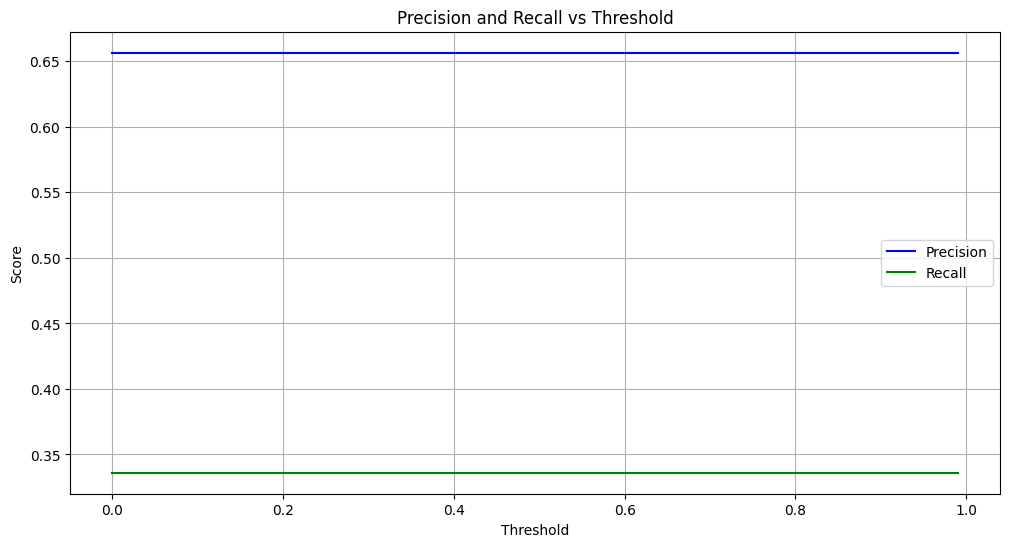

In [101]:
plt.figure(figsize=(12,6))
plt.plot(thresholds,precision_val,label = 'Precision',color = 'b')
plt.plot(thresholds,recall_values,label = 'Recall',color = 'g')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

In [111]:
precision_val = []
recall_values = []

for threshold in tqdm(thresholds):
    predicted_labels = (y_pred >= threshold).astype(int)
    print(predicted_labels)
    precision = precision_score(y_val,y_pred,zero_division=0)
    recall = recall_score(y_val,y_pred,zero_division=0)

    precision_val.append(precision)
    recall_values.append(recall)

 41%|████      | 41/100 [00:00<00:00, 209.95it/s]

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 88%|████████▊ | 88/100 [00:00<00:00, 220.38it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


100%|██████████| 100/100 [00:00<00:00, 214.71it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [126]:
flat = thresholds.flatten()
flat

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [129]:
prec_rec_df = pd.DataFrame({'recall':recall_values,
                            'precision':precision_val,
                            'thresh':thresholds})
prec_rec_df

,recall,precision,thresh
0,0.336066,0.656584,0.00
1,0.336066,0.656584,0.01
2,0.336066,0.656584,0.02
3,0.336066,0.656584,0.03
4,0.336066,0.656584,0.04
...,...,...,...
95,0.336066,0.656584,0.95
96,0.336066,0.656584,0.96
97,0.336066,0.656584,0.97
98,0.336066,0.656584,0.98


In [130]:
prec_rec_df['thresh'][prec_rec_df['recall'] == prec_rec_df['precision']]

Series([], Name: thresh, dtype: float64)

In [113]:
recall_values

[0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737704918,
 0.3360655737

In [106]:
def tpr_fpr_dataframe(y_val,y_pred):
    scores = []
    thresholds = np.arange(0.0,1.0,0.01)

    for t in tqdm(thresholds):
        tp = ((y_pred >=t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred <  t) & (y_val == 0)).sum()
        scores.append((t,tp,fp,fn,tn))

        df_scores = pd.DataFrame(scores)
        df_scores.columns = ['threshold','tp','fp','fn','tn']

        df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
        df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [107]:
df_log_reg = tpr_fpr_dataframe(y_val,y_pred)
df_log_reg

100%|██████████| 100/100 [00:00<00:00, 519.32it/s]


,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,1098,7945,0,0,1.000000,1.000000
1,0.01,369,193,729,7752,0.336066,0.024292
2,0.02,369,193,729,7752,0.336066,0.024292
3,0.03,369,193,729,7752,0.336066,0.024292
4,0.04,369,193,729,7752,0.336066,0.024292
...,...,...,...,...,...,...,...
95,0.95,369,193,729,7752,0.336066,0.024292
96,0.96,369,193,729,7752,0.336066,0.024292
97,0.97,369,193,729,7752,0.336066,0.024292
98,0.98,369,193,729,7752,0.336066,0.024292


In [109]:
df_log_reg['threshold'][df_log_reg['tpr'] == df_log_reg['fpr']]

0    0.0
Name: threshold, dtype: float64

In [ ]:
def prec_rec(y_val,y_pred):

    precision_val = []
    recall_values = []
    for thresh in tqdm(thresholds):
        
        precision = precision_score(y_val,y_pred,zero_division=0)
        recall = recall_score(y_val,y_pred,zero_division=0)

        precision_val.append(precision)
        recall_values.append(recall)

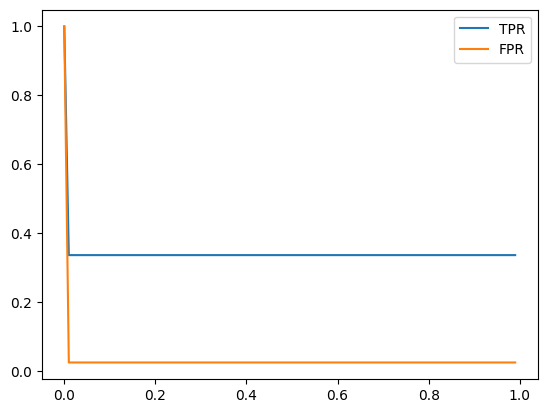

In [108]:
plt.plot(df_log_reg.threshold, df_log_reg.tpr,label = 'TPR')
plt.plot(df_log_reg.threshold, df_log_reg.fpr,label = 'FPR')
plt.legend()